In [760]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import warnings
warnings.filterwarnings(action='ignore')
import platform

if platform.system() == 'Darwin':
    plt.rc('font', family = 'AppleGothic')
plt.rc('axes', unicode_minus = False)

In [761]:
raw_data = pd.read_excel('./Public data Compt/data/제10회 산업통상자원부 공공데이터활용 BI공모전_빅데이터 분석 과제 1_데이터.xlsx', sheet_name='2. raw data')

In [762]:
df = raw_data.copy()
df

,기간,한국 수출금액,한국의대중국수출,한국의대미국수출,한국의대베트남수출,한국의대홍콩수출,한국의대일본수출
0,2000-01-01,12162424632,1235215271,2609787984,109742698,782348732,1551722070
1,2000-02-01,12676042304,1273117309,2554309883,112395157,823990122,1518844843
2,2000-03-01,14429703086,1437377223,2946820669,150134562,911648256,1783564618
3,2000-04-01,13522040017,1366876604,2698029849,169146208,863243219,1582707525
4,2000-05-01,14636754971,1663240667,3167181403,169411680,887081090,1671039709
...,...,...,...,...,...,...,...
259,2021-08-01,53165103786,13881327880,7704223847,4850337611,3415828590,2522980082
260,2021-09-01,55913862375,14291980345,7983934107,5101701490,3852088155,2541017857
261,2021-10-01,55660372637,14415867215,8066782602,4904971459,2739662629,2614683864
262,2021-11-01,60330542263,15272549044,8133640339,5478296945,3232583381,2813250497


## EDA(Exploratory Data Analysis) 

- 수출 금액 예측에 앞서 제공된 데이터들을 알아보고 시각화 해보고자 한다.

In [763]:
# 단위가 너무 커서 Million $로 단위를 변경한 후, 소수점 셋 째자리($1000)까지만 표현하였다.

def get_million(x):
    million = 1000000
    return x/million

for col in df.columns:
    if col == '기간':
        continue
    df[col] = round(df[col].apply(lambda x: get_million(x)), 3)

df
    

,기간,한국 수출금액,한국의대중국수출,한국의대미국수출,한국의대베트남수출,한국의대홍콩수출,한국의대일본수출
0,2000-01-01,12162.425,1235.215,2609.788,109.743,782.349,1551.722
1,2000-02-01,12676.042,1273.117,2554.310,112.395,823.990,1518.845
2,2000-03-01,14429.703,1437.377,2946.821,150.135,911.648,1783.565
3,2000-04-01,13522.040,1366.877,2698.030,169.146,863.243,1582.708
4,2000-05-01,14636.755,1663.241,3167.181,169.412,887.081,1671.040
...,...,...,...,...,...,...,...
259,2021-08-01,53165.104,13881.328,7704.224,4850.338,3415.829,2522.980
260,2021-09-01,55913.862,14291.980,7983.934,5101.701,3852.088,2541.018
261,2021-10-01,55660.373,14415.867,8066.783,4904.971,2739.663,2614.684
262,2021-11-01,60330.542,15272.549,8133.640,5478.297,3232.583,2813.250


In [764]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 264 entries, 0 to 263
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   기간         264 non-null    datetime64[ns]
 1   한국 수출금액    264 non-null    float64       
 2   한국의대중국수출   264 non-null    float64       
 3   한국의대미국수출   264 non-null    float64       
 4   한국의대베트남수출  264 non-null    float64       
 5   한국의대홍콩수출   264 non-null    float64       
 6   한국의대일본수출   264 non-null    float64       
dtypes: datetime64[ns](1), float64(6)
memory usage: 14.6 KB


#### - Column별 분석 및 결측치 조사

In [765]:
for col in df.columns:
    if col != '기간':
        description = df[col].describe()
        isnullsum = df[col].isnull().sum()
        print(f'{col} column의 description과 null값의 개수는 다음과 같다. \n{description}\n null값 개수 : {isnullsum}\n')
    else:
        isnullsum = df[col].isnull().sum()
        print(f'{col} column의 null값의 개수는 다음과 같다. \n null값 개수 : {isnullsum}\n')


기간 column의 null값의 개수는 다음과 같다. 
 null값 개수 : 0

한국 수출금액 column의 description과 null값의 개수는 다음과 같다. 
count      264.000000
mean     35232.517625
std      13373.323529
min      11023.037000
25%      23252.280000
50%      39397.020000
75%      46312.551750
max      60734.117000
Name: 한국 수출금액, dtype: float64
 null값 개수 : 0

한국의대중국수출 column의 description과 null값의 개수는 다음과 같다. 
count      264.000000
mean      8373.894644
std       4046.707431
min       1235.215000
25%       4910.558500
50%       9678.116500
75%      11657.769250
max      15342.563000
Name: 한국의대중국수출, dtype: float64
 null값 개수 : 0

한국의대미국수출 column의 description과 null값의 개수는 다음과 같다. 
count     264.000000
mean     4586.592011
std      1478.022094
min      2267.664000
25%      3380.042000
50%      4392.580000
75%      5726.193250
max      8787.542000
Name: 한국의대미국수출, dtype: float64
 null값 개수 : 0

한국의대베트남수출 column의 description과 null값의 개수는 다음과 같다. 
count     264.000000
mean     1637.289409
std      1568.663798
min        94.831000
25%       300

- 수출금액 데이터의 전체적인 추이를 파악한다

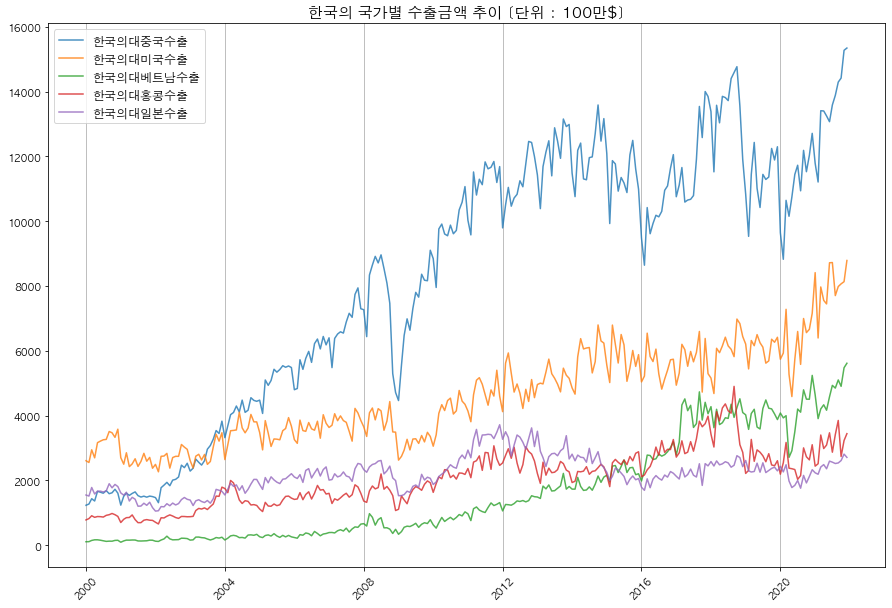

In [766]:
plt.figure(figsize=(15,10))
plt.title('한국의 국가별 수출금액 추이 [단위 : 100만$]', fontsize=15)
for col in df.columns:
    if col == '기간' or col == '한국 수출금액':
        continue
    plt.plot(df['기간'], df[col], '-', alpha = .8, label = str(col))
    
ax = plt.gca()
ax.xaxis.grid(True)
plt.legend(fontsize=12)
plt.xticks(rotation=45)
plt.show()

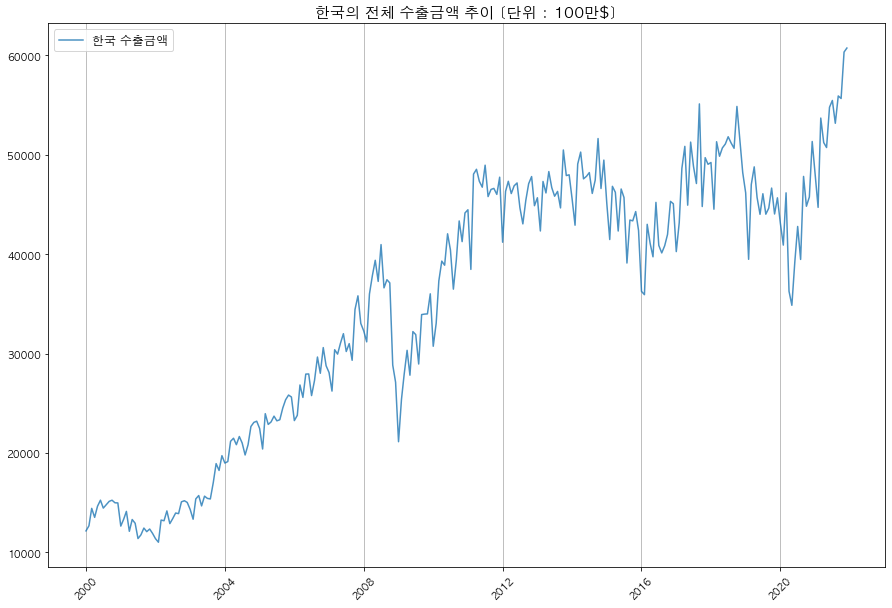

In [767]:
col = '한국 수출금액'

plt.figure(figsize=(15,10))
plt.title('한국의 전체 수출금액 추이 [단위 : 100만$]', fontsize=15)
plt.plot(df['기간'], df[col], '-', alpha = .8, label = str(col))
    
ax = plt.gca()
ax.xaxis.grid(True)
plt.legend(fontsize=12)
plt.xticks(rotation=45)
plt.show()

## 상관 분석(Correlation analysis)

- 과제에서 지정한 독립변수 와 타겟(종속)변수 모두 수치형 자료이므로 상관 분석을 실시해보는 것이 적합하다고 판단된다.

In [768]:
corr = df.corr(method='pearson').apply(lambda x: round(x ,4))
corr

,한국 수출금액,한국의대중국수출,한국의대미국수출,한국의대베트남수출,한국의대홍콩수출,한국의대일본수출
한국 수출금액,1.0000,0.9862,0.8831,0.7823,0.8986,0.7880
한국의대중국수출,0.9862,1.0000,0.8658,0.7867,0.9058,0.7504
한국의대미국수출,0.8831,0.8658,1.0000,0.8971,0.8285,0.5608
한국의대베트남수출,0.7823,0.7867,0.8971,1.0000,0.8272,0.3541
한국의대홍콩수출,0.8986,0.9058,0.8285,0.8272,1.0000,0.6305
한국의대일본수출,0.7880,0.7504,0.5608,0.3541,0.6305,1.0000


##### -> 한국의 전체 수출금액과 한국의 대중국수출금액의 상관계수가 0.9862로 상관성이 매우 높은 것을 알 수 있다.

## 데이터 특성 확인 및 시계열 예측 모델 비교/선택

- 제공된 수출금액 데이터는 시간에 흐름에 따라 수츨 금액을 저장한 시계열 데이터 이므로, 특정 시계열 예측 모델에 효율적인지를 파악하기 위해 데이터의 통계적 특성을 알아본다.

In [769]:
# 한국 수출금액 != 대중국 + 대미국 + 대베트남 + 대홍콩 + 대일본
# -> 한국 수출금액 만을 사용하기 위해 또다른 df설정

df_amount = df[['기간', '한국 수출금액']]
df_amount.columns = ['ds', 'y']
df_amount = df_amount.set_index('ds')
df_amount

,y
ds,
2000-01-01,12162.425
2000-02-01,12676.042
2000-03-01,14429.703
2000-04-01,13522.040
2000-05-01,14636.755
...,...
2021-08-01,53165.104
2021-09-01,55913.862
2021-10-01,55660.373


- 정상성 확인을 위해 데이터의 패턴을 파악해보자

<Figure size 432x288 with 0 Axes>

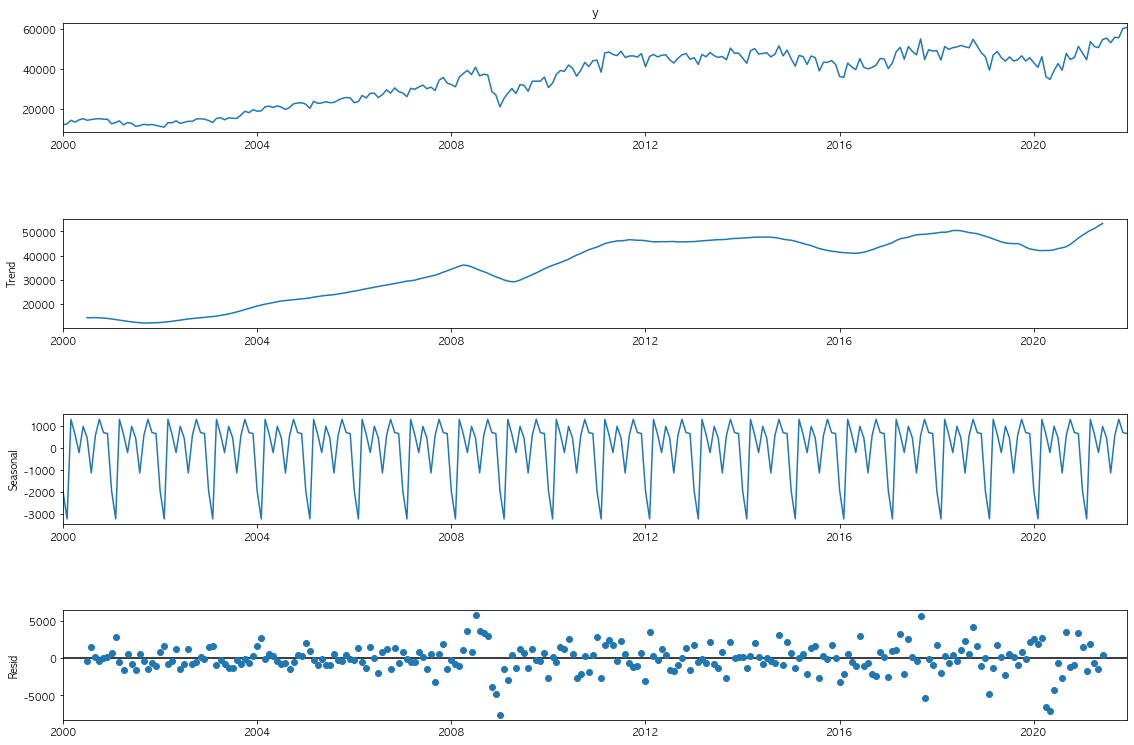

In [770]:
from statsmodels.tsa.seasonal import seasonal_decompose

tmp = seasonal_decompose(df_amount['y'], model = 'additive')

fig = plt.figure()
fig = tmp.plot()
fig.set_size_inches(18,12)

=> 데이터에 패턴이 보이기 때문에 정상성을 만족하지 못하는 것으로 파악된다. 그러므로 이것을 판단하기 위해 ACF, PACF그래프를 그린다

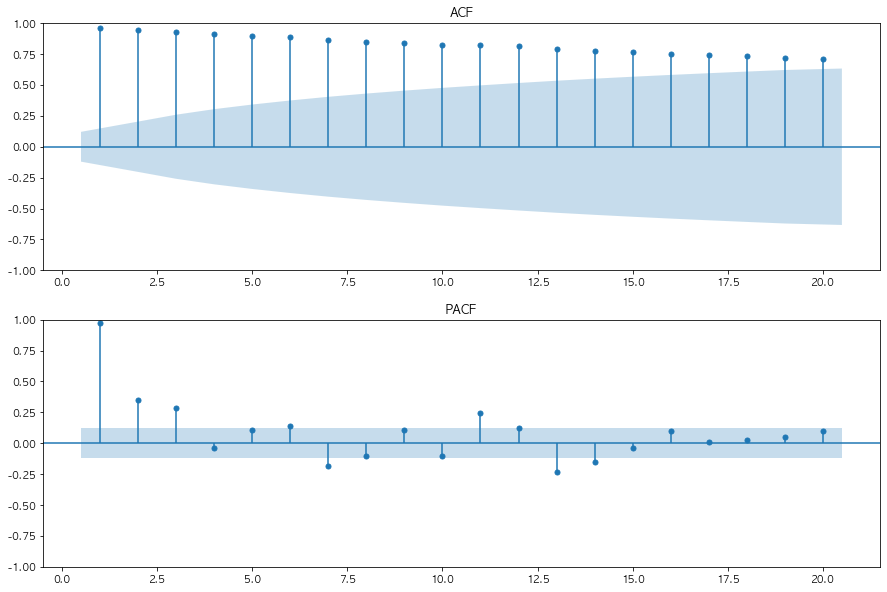

In [771]:
import statsmodels.graphics.tsaplots as sgt

fig = plt.figure(figsize=(15,10))
ax1 = fig.add_subplot(2, 1, 1)
ax2 = fig.add_subplot(2, 1, 2)

sgt.plot_acf(df_amount['y'], lags = 20, zero = False, ax=ax1)
ax1.set_title('ACF')

sgt.plot_pacf(df_amount['y'], lags = 20, zero = False, method = ('ols'), ax=ax2)
ax2.set_title('PACF')

plt.show()

=> ACF그래프가 아주 천천히 작아지는 것은 정상성을 만족하지 못한다는 것을 의미한다.

- ADF 검정(Augmented Dickey-Fuller test)으로 정상성을 확인해보자

이 검정은 다음과 같은 가설을 따른다

1. H0(귀무가설) : 정상성을 만족하지 않는다.
2. H1(대립가설) : 정상성을 만족한다.

In [772]:
df_stationarityTest = adfuller(df_amount['y'], autolag='AIC')
print('P-value :', df_stationarityTest[1]) 

P-value : 0.7653958970508719


=> p-value가 0.05를 넘으므로 귀무가설을 기각하지 못하고 채택하며, 따라서 본 데이터는 정상성을 만족하지 못한다 라고 판단된다.

- 데이터의 정상성을 확보하기 위해 로그 변환, 차분을 실시한다.

In [773]:
from sklearn.metrics import mean_squared_error
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller

In [774]:
df_amount_log = df_amount.copy()
df_amount_log['y'] = np.log(df_amount_log['y'])
df_amount_log

,y
ds,
2000-01-01,9.406107
2000-02-01,9.447469
2000-03-01,9.577044
2000-04-01,9.512076
2000-05-01,9.591291
...,...
2021-08-01,10.881158
2021-09-01,10.931568
2021-10-01,10.927024


In [775]:
def todiff(dataset, interval=1):
    diff = list()
    for i in range(interval, len(dataset)):
        value = dataset.iloc[i] - dataset.iloc[i-interval]
        diff.append(value)
    return np.array(diff)

diff_1 = todiff(df_amount_log)
df_diff = pd.DataFrame(diff_1, columns = ['y'], index = df_amount.index[1:])
df_diff

,y
ds,
2000-02-01,0.041362
2000-03-01,0.129575
2000-04-01,-0.064968
2000-05-01,0.079215
2000-06-01,0.041105
...,...
2021-08-01,-0.042287
2021-09-01,0.050410
2021-10-01,-0.004544


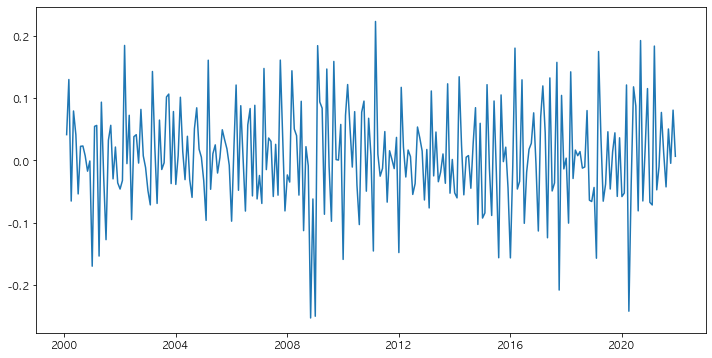

In [776]:
plt.figure(figsize=(12,6))
plt.plot(df_diff)
plt.show()

In [777]:
df_stationarityTest = adfuller(df_diff[:], autolag='AIC')
print('P-value :', df_stationarityTest[1]) 

P-value : 0.0028370246884821845


=> 데이터의 패턴에 규칙성 x, p-value <0.05로 귀무가설 기각 = 데이터 정상성 만족

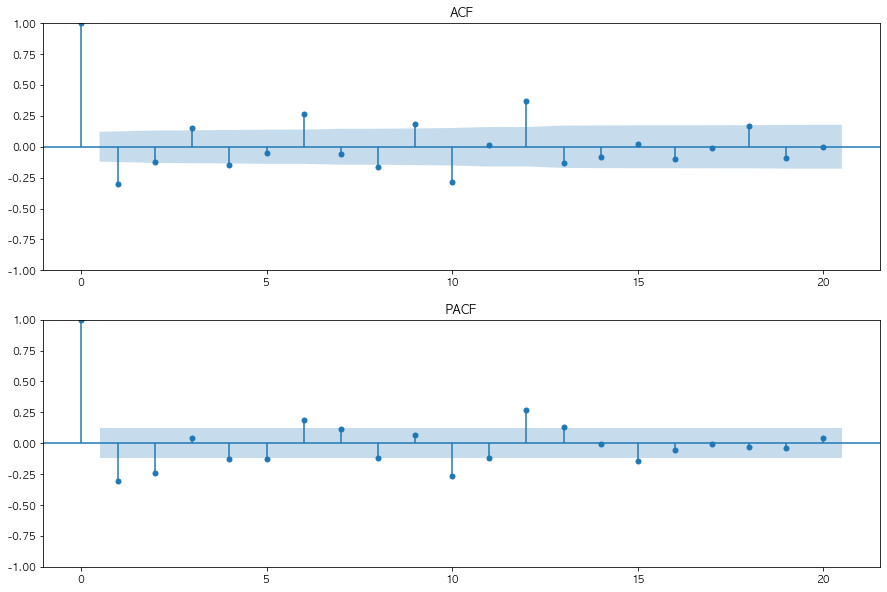

In [778]:
import statsmodels.graphics.tsaplots as sgt

fig = plt.figure(figsize=(15,10))
ax1 = fig.add_subplot(2, 1, 1)
ax2 = fig.add_subplot(2, 1, 2)

sgt.plot_acf(df_diff, lags = 20, ax=ax1)
ax1.set_title('ACF')

sgt.plot_pacf(df_diff, lags = 20, ax=ax2)
ax2.set_title('PACF')

plt.show()

### 1. ARIMA(Autoregressive-Intergrated Moving Average) Model

In [779]:
from statsmodels.tsa.arima.model import ARIMA

In [780]:
df_diff

,y
ds,
2000-02-01,0.041362
2000-03-01,0.129575
2000-04-01,-0.064968
2000-05-01,0.079215
2000-06-01,0.041105
...,...
2021-08-01,-0.042287
2021-09-01,0.050410
2021-10-01,-0.004544


In [781]:
train_data = df_diff[:256]
test_data = df_diff[256:]

train_data = train_data[:].astype(np.float)
test_data = test_data[:].astype(np.float)

ARIMA 클래스에 order=(2,1,1)라고 입력되어진 파라미터는 'AR이 몇번째 과거까지를 바라보는지에 대한 파라미터 (2), 차분(Defference)에 대한 파라미터(1), MA가 몇 번째 과거까지를 바라보는지에 대한 파라미터(1)'를 의미한다.

In [782]:
# train_data(df_diff)

model_arima = ARIMA(train_data, order=(2, 1, 1))
model_arima_fit = model_arima.fit()
print(model_arima_fit.summary())


                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  256
Model:                 ARIMA(2, 1, 1)   Log Likelihood                 292.034
Date:                Thu, 07 Jul 2022   AIC                           -576.067
Time:                        14:18:57   BIC                           -561.902
Sample:                    02-01-2000   HQIC                          -570.369
                         - 05-01-2021                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.3753      0.056     -6.658      0.000      -0.486      -0.265
ar.L2         -0.2344      0.054     -4.331      0.000      -0.340      -0.128
ma.L1         -0.9997      0.332     -3.011      0.0

In [783]:
fore = model_arima_fit.forecast(steps=7)
fore

2021-06-01    0.023563
2021-07-01    0.002322
2021-08-01    0.002468
2021-09-01    0.007392
2021-10-01    0.005510
2021-11-01    0.005062
2021-12-01    0.005671
Freq: MS, Name: predicted_mean, dtype: float64

## 한국 수출금액 예측

In [784]:
# final forecasting

model_arima_final = ARIMA(df_diff, order=(2, 1, 1))
model_arima_final_fit = model_arima_final.fit()
print(model_arima_final_fit.summary())


                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  263
Model:                 ARIMA(2, 1, 1)   Log Likelihood                 302.552
Date:                Thu, 07 Jul 2022   AIC                           -597.105
Time:                        14:18:57   BIC                           -582.832
Sample:                    02-01-2000   HQIC                          -591.368
                         - 12-01-2021                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.3752      0.055     -6.786      0.000      -0.484      -0.267
ar.L2         -0.2352      0.053     -4.433      0.000      -0.339      -0.131
ma.L1         -0.9996      0.206     -4.846      0.0

In [785]:
fore_final = model_arima_final_fit.forecast(steps=6)
fore_final

2022-01-01   -0.011869
2022-02-01    0.012467
2022-03-01    0.007695
2022-04-01    0.003762
2022-05-01    0.006360
2022-06-01    0.006310
Freq: MS, Name: predicted_mean, dtype: float64

In [786]:
df_final_index = df_amount.index.append(fore_final.index)

df_final = pd.DataFrame(index = df_final_index, columns = df_amount.columns)
df_final.iloc[0] = df_amount.iloc[0]

for i in range(1, 263):
    df_final.iloc[i] = df_amount.iloc[i] + df_diff.iloc[i-1]

df_final.iloc[263] = df_amount_log.iloc[-1]

for v in range(264, len(df_final)):
    df_final.iloc[v] = df_final.loc[df_final.index[v-1],'y'] + fore_final[v-264]
    
for z in range(263, len(df_final)):
     df_final.iloc[z] = np.exp(df_final.loc[df_final.index[z], 'y'])

df_final

,y
2000-01-01,12162.425
2000-02-01,12676.083362
2000-03-01,14429.832575
2000-04-01,13521.975032
2000-05-01,14636.834215
...,...
2022-02-01,60770.443862
2022-03-01,61239.881569
2022-04-01,61470.710928
2022-05-01,61862.914517


#### 예측된 한국의 수출금액 [2022-01 - 2022-06]

In [787]:
df_final = df_final.apply(lambda x : x * 1000000)
df_final.iloc[264:]

,y
2022-01-01,60017536644.227547
2022-02-01,60770443861.614388
2022-03-01,61239881569.476212
2022-04-01,61470710928.33461
2022-05-01,61862914517.289116
2022-06-01,62254519714.313049


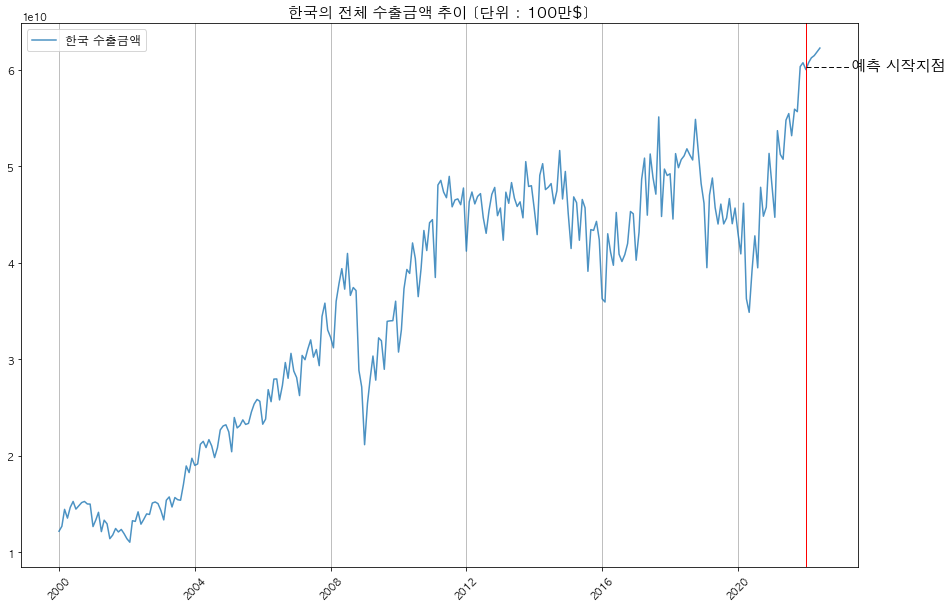

In [790]:
col = '한국 수출금액'

plt.figure(figsize=(15,10))
plt.title('한국의 전체 수출금액 추이 [단위 : 100만$]', fontsize=15)
plt.plot(df_final.index, df_final['y'], '-', alpha = .8, label = str(col))
plt.text('2022-01-01', 60017536644.227547, '------예측 시작지점', fontsize=15)

ax = plt.gca()
ax.xaxis.grid(True)
plt.axvline('2022-01-01',color='r', linewidth=1 )
plt.legend(fontsize=12)
plt.xticks(rotation=45)
plt.show()